<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r0-unbalanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-3-r0.csv?token=AKVFSODX6I2TT734XLXBWHK6ZLG42')
print(df.shape)
df

(89599, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9,1
1,88,0,1,4,1,1,5,17,23,7,0,0,1,4,4,1.000000,20,6,2,7,12,84,0,4,4,4,20,85,100,1
2,88,1,2,1,1,4,3,9,3,3,24,8,3,5,3,0.600000,16,5,3,7,15,105,2,1,4,12,3,27,9,1
3,89,0,1,4,2,2,5,17,23,7,0,0,1,4,4,1.000000,21,4,4,7,16,112,0,8,16,16,20,85,100,1
4,90,0,1,4,3,2,5,17,23,7,0,0,1,4,4,1.000000,22,3,5,7,15,105,0,12,24,24,20,85,100,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89594,3268820,1,2,6,2,2,3,9,18,2,20,4,20042,3,2,0.666667,19,1,1,1,1,1,2,12,24,481008,18,27,54,1
89595,3268827,1,2,6,3,2,3,9,18,2,20,4,20042,3,2,0.666667,26,1,1,1,1,1,2,18,36,721512,18,27,54,1
89596,3268834,1,2,6,4,2,3,9,18,2,20,4,20042,3,2,0.666667,33,1,1,1,1,1,2,24,48,962016,18,27,54,1
89597,3268841,1,2,6,5,3,3,9,18,2,20,4,20042,3,2,0.666667,40,1,1,1,1,1,2,30,90,1803780,18,27,54,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-1-r0.csv?token=AKVFSOHVZXKNXHUERTCNOQS6ZLG7K')
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-6-r0.csv?token=AKVFSOCRKWYEHJLCR2KBXIK6ZLG7O')
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-9-r0.csv?token=AKVFSOCOTYE3II6VV6XDQEK6ZLG7S')
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-14-r0.csv?token=AKVFSOCLCPZBSW4VNL63DV26ZLG7U')

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-12-r0.csv?token=AKVFSOGFRSW32TLLZ5TLXCK6ZLHE6')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-15-r0.csv?token=AKVFSOB6IBOT4PJHJWHQHBS6ZLHFC')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-5-r0.csv?token=AKVFSOBGH2Q7UMN56PRI4YK6ZLHFE')

In [0]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(107019, 30)
(101847, 30)
(101827, 30)
(101827, 30)
(85791, 30)
(84463, 30)
(84442, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [0]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9,1
1,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9,0
2,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9,0
3,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,6,1,6,6,36,0,1,4,4,3,27,9,1
4,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756810,3275304,1,2,6,2,2,3,9,18,2,20,4,20057,3,2,0.666667,19,1,1,1,1,1,2,12,24,481368,18,27,54,1
756811,3275311,1,2,6,3,2,3,9,18,2,20,4,20057,3,2,0.666667,26,1,1,1,1,1,2,18,36,722052,18,27,54,1
756812,3275318,1,2,6,4,2,3,9,18,2,20,4,20057,3,2,0.666667,33,1,1,1,1,1,2,24,48,962736,18,27,54,1
756813,3275325,1,2,6,5,3,3,9,18,2,20,4,20057,3,2,0.666667,40,1,1,1,1,1,2,30,90,1805130,18,27,54,1


In [0]:
df.shape

(756815, 30)

Test Data

In [0]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-2-r0.csv?token=AKVFSOFDMXA75H6CNTVGIKC6ZLHJI')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-5-r0.csv?token=AKVFSOGW6M257GDW6ER4EQS6ZLHJK')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-10-r0.csv?token=AKVFSOCMHELQ6UD6XJQ5JOS6ZLHJO')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-12-r0.csv?token=AKVFSOHGCSBFO3S4AXJQ5QS6ZLHJS')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-13-r0.csv?token=AKVFSOEZ36S26XRECQAAVQK6ZLHJW')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-malicious-n-0-3-m-15-r0.csv?token=AKVFSODKGG3YMEORNYRLGLK6ZLHJ2')
df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r0/2-fft-normal-n-0-10-r0.csv?token=AKVFSOAD4XVDT2JGQXKKYBK6ZLHOA')
print(df5.shape)
print(df6.shape)
print(df7.shape)
print(df8.shape)
print(df9.shape)
print(df10.shape)
print(df14.shape)

(107019, 30)
(101827, 30)
(101827, 30)
(103175, 30)
(101852, 30)
(101859, 30)
(84441, 30)


In [0]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,7,2,0,1,1,4,3,9,0,0,23,7,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9,0
1,88,1,2,1,1,4,3,9,3,3,24,8,4,5,3,0.600000,16,1,2,2,2,4,2,1,4,16,3,27,9,0
2,110,0,1,4,1,1,5,17,23,7,0,0,1,4,4,1.000000,20,12,1,12,12,144,0,4,4,4,20,85,100,0
3,110,1,2,1,1,4,3,9,2,2,24,8,5,4,2,0.500000,12,11,2,12,22,264,2,1,4,20,3,27,9,0
4,111,0,1,4,2,2,5,17,23,7,0,0,1,4,4,1.000000,21,10,3,12,30,360,0,8,16,16,20,85,100,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107014,3270336,1,2,6,2,2,3,9,18,2,20,4,30065,3,2,0.666667,19,1,1,1,1,1,2,12,24,721560,18,27,54,0
107015,3270343,1,2,6,3,2,3,9,18,2,20,4,30065,3,2,0.666667,26,1,1,1,1,1,2,18,36,1082340,18,27,54,0
107016,3270350,1,2,6,4,2,3,9,18,2,20,4,30065,3,2,0.666667,33,1,1,1,1,1,2,24,48,1443120,18,27,54,0
107017,3270357,1,2,6,5,3,3,9,18,2,20,4,30065,3,2,0.666667,40,1,1,1,1,1,2,30,90,2705850,18,27,54,0


In [0]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [0]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.425531,0.008271,-0.003751,0.005840,-0.681418,-0.607687,0.008726,0.176858,-0.633821,-0.849877,0.066807,-0.076613,0.008395,-0.047686,-0.029881,-0.025063,0.101424,0.082691,0.041225,0.035184,-0.496932,-0.657501,-0.690968,-0.004154
inport,-0.425531,1.000000,0.185431,-0.011325,0.017630,0.072783,-0.045380,-0.021450,0.138645,0.568902,0.668633,0.289064,0.068416,0.014452,0.057926,0.057804,0.043762,0.792811,0.062707,0.060118,0.026344,0.221038,0.026105,0.160568,-0.093242
cache_coherence_type,0.008271,0.185431,1.000000,0.218094,-0.339525,-0.270179,-0.339373,0.010653,-0.006367,0.040614,0.007310,-0.246595,0.084740,-0.064677,0.014025,0.037568,0.038499,0.213250,0.460489,0.383219,0.270407,0.701494,-0.300074,0.190195,-0.013802
flit_id,-0.003751,-0.011325,0.218094,1.000000,0.043476,0.151004,0.120115,0.004199,0.000934,0.006945,0.011817,0.399604,-0.061323,0.087317,0.018171,0.037346,0.020414,0.002508,0.945848,0.904336,0.639174,0.308381,0.139883,0.255537,0.000680
flit_type,0.005840,0.017630,-0.339525,0.043476,1.000000,-0.235080,-0.186994,-0.006536,-0.001453,-0.010812,-0.018397,0.522793,-0.139867,0.163485,0.016510,-0.010132,-0.001751,-0.003904,-0.021619,0.234859,0.166127,-0.480083,-0.217767,-0.397817,-0.001058
vnet,-0.681418,0.072783,-0.270179,0.151004,-0.235080,1.000000,0.966200,-0.022638,-0.040625,0.461498,0.672006,-0.207050,-0.004093,-0.041509,-0.031876,-0.060099,-0.076684,-0.364724,-0.053359,-0.069258,-0.061574,0.496642,0.994667,0.893848,0.056476
vc,-0.607687,-0.045380,-0.339373,0.120115,-0.186994,0.966200,1.000000,-0.028334,-0.067067,0.367111,0.563960,-0.214563,-0.017319,-0.017515,-0.024350,-0.053367,-0.069019,-0.450305,-0.096691,-0.101308,-0.088373,0.409247,0.987635,0.827161,0.065465
traversal_id,0.008726,-0.021450,0.010653,0.004199,-0.006536,-0.022638,-0.028334,1.000000,0.057008,0.009489,-0.023826,0.026805,0.093561,0.093644,0.130860,0.101746,0.081748,-0.015192,0.005059,0.004157,0.558262,-0.007153,-0.025102,-0.018122,-0.312737
hop_count,0.176858,0.138645,-0.006367,0.000934,-0.001453,-0.040625,-0.067067,0.057008,1.000000,0.515079,0.083088,0.340358,-0.062151,-0.099242,-0.112817,-0.108309,-0.100389,0.158017,-0.004608,-0.003249,0.027704,-0.035810,-0.051536,-0.044389,-0.016383
current_hop,-0.633821,0.568902,0.040614,0.006945,-0.010812,0.461498,0.367111,0.009489,0.515079,1.000000,0.784050,0.307713,0.058333,-0.092051,-0.023570,-0.031290,-0.032139,0.191414,-0.035397,-0.010535,-0.005115,0.378216,0.427516,0.489488,-0.021430


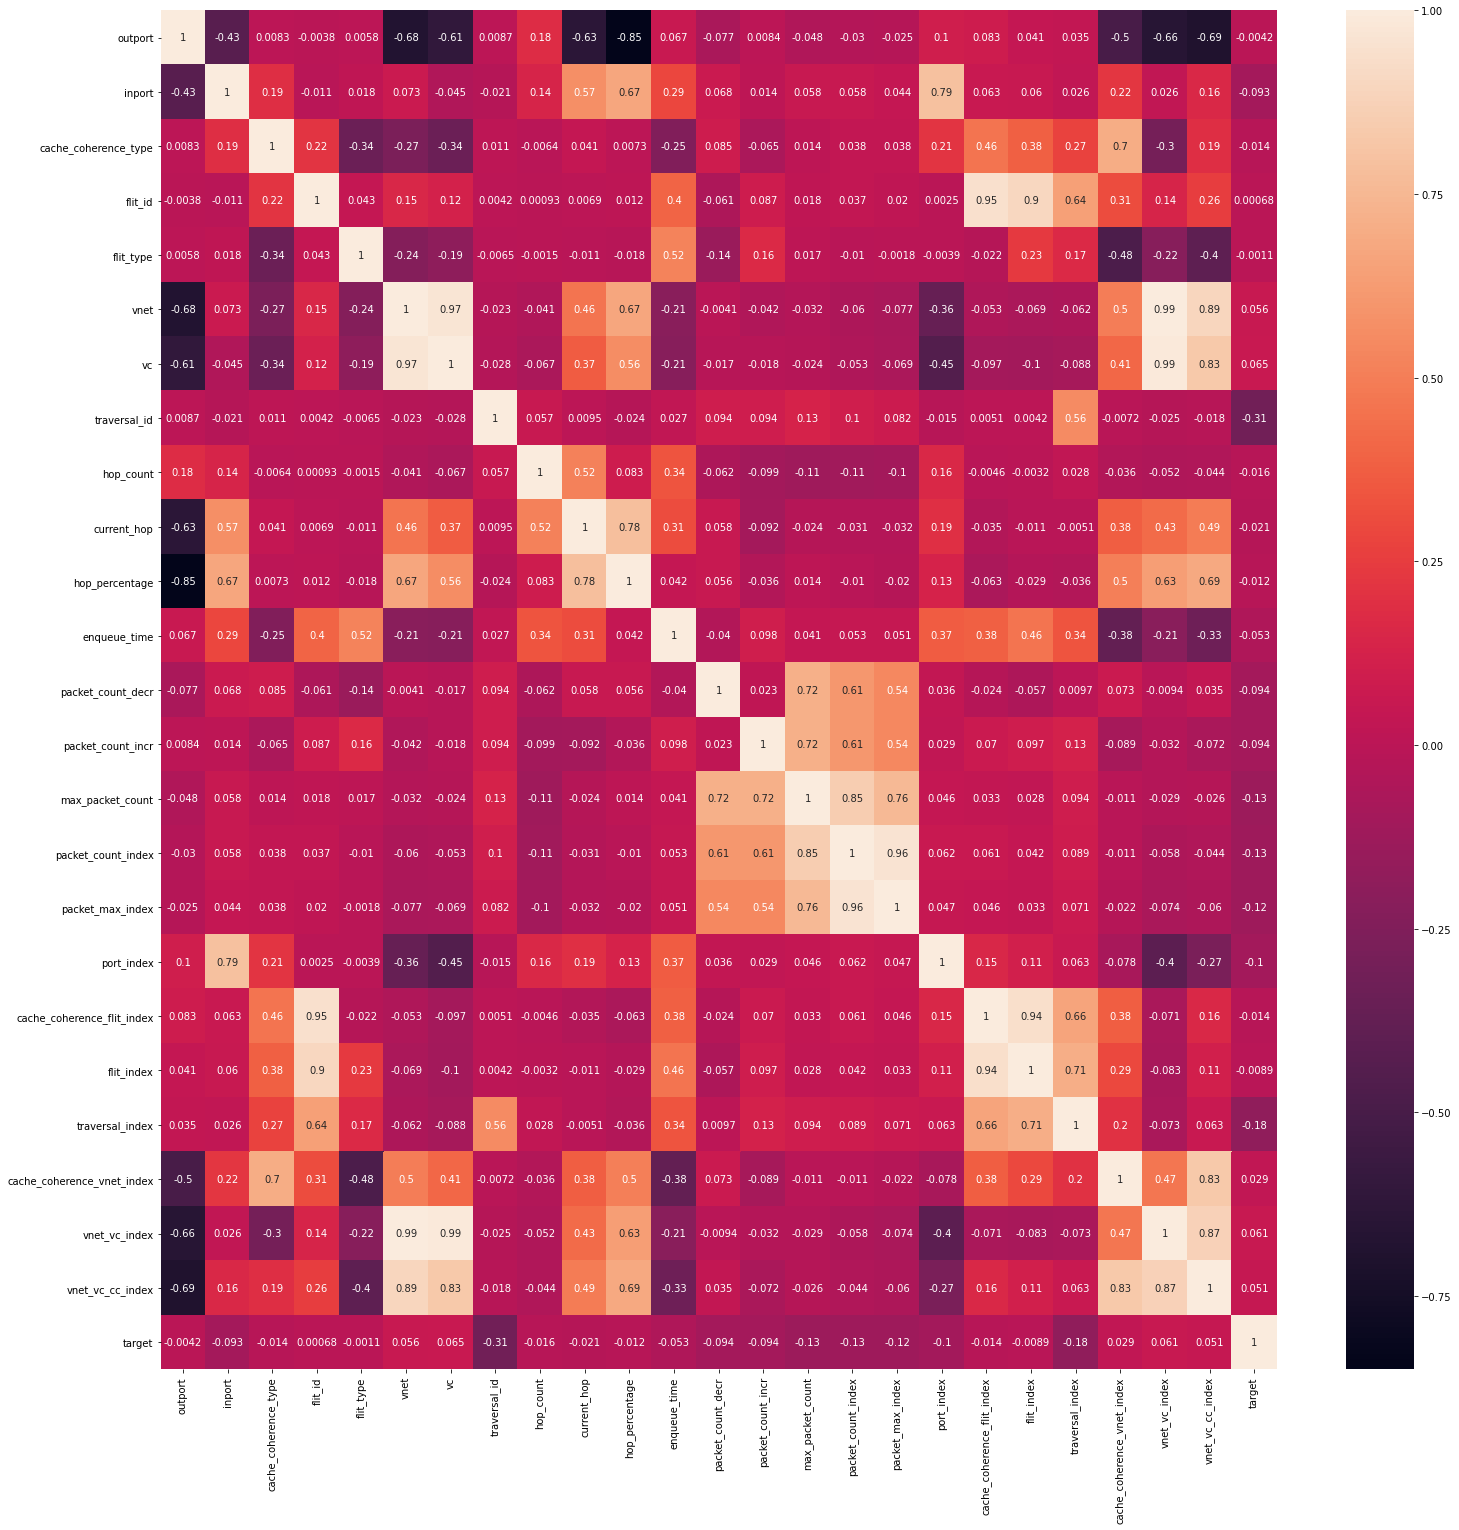

In [0]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [0]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,0,1,1,4,3,9,1,4,0,0.000000,4,7,1,7,7,49,0,1,4,4,3,27,9
1,2,0,1,1,4,3,9,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9
2,2,0,1,1,4,3,9,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9
3,2,0,1,1,4,3,9,1,4,0,0.000000,4,6,1,6,6,36,0,1,4,4,3,27,9
4,2,0,1,1,4,3,9,1,4,0,0.000000,4,2,1,2,2,4,0,1,4,4,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756810,1,2,6,2,2,3,9,20057,3,2,0.666667,19,1,1,1,1,1,2,12,24,481368,18,27,54
756811,1,2,6,3,2,3,9,20057,3,2,0.666667,26,1,1,1,1,1,2,18,36,722052,18,27,54
756812,1,2,6,4,2,3,9,20057,3,2,0.666667,33,1,1,1,1,1,2,24,48,962736,18,27,54
756813,1,2,6,5,3,3,9,20057,3,2,0.666667,40,1,1,1,1,1,2,30,90,1805130,18,27,54


In [0]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.171429,0.0,0.171429,0.017595,0.003899,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.028571,0.0,0.028571,0.002933,0.000244,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.028571,0.0,0.028571,0.002933,0.000244,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.142857,0.0,0.142857,0.014663,0.002843,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.028571,0.0,0.028571,0.002933,0.000244,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756810,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.666578,0.500000,0.333333,0.666667,0.214286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.177762,0.833333,0.000000,0.494505
756811,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.666578,0.500000,0.333333,0.666667,0.314286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.266643,0.833333,0.000000,0.494505
756812,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.666578,0.500000,0.333333,0.666667,0.414286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.355525,0.833333,0.000000,0.494505
756813,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.666578,0.500000,0.333333,0.666667,0.514286,0.000000,0.0,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.666611,0.833333,0.000000,0.494505


In [0]:
train_X[train_X.duplicated()].shape

(17032, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [0]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.03125,0.00000,0.03125,0.003472,0.000315,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000100,0.833333,0.500000,0.600000,0.179104,0.00000,0.03125,0.03125,0.003472,0.000315,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.238806,0.34375,0.00000,0.34375,0.038194,0.014996,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000133,0.666667,0.333333,0.500000,0.119403,0.31250,0.03125,0.34375,0.072917,0.027580,1.0,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
4,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.253731,0.28125,0.06250,0.34375,0.100694,0.037647,0.0,0.241379,0.139535,0.000004,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107014,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.223881,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.494505
107015,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.328358,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.494505
107016,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.432836,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505
107017,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.537313,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
test_X[test_X.duplicated()].shape

(55, 24)

In [0]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(42, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.03125,0.00000,0.03125,0.003472,0.000315,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000100,0.833333,0.500000,0.600000,0.176471,0.00000,0.03125,0.03125,0.003472,0.000315,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.235294,0.31250,0.00000,0.31250,0.034722,0.012584,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.264706,0.28125,0.03125,0.31250,0.065972,0.022966,0.0,0.241379,0.139535,0.000004,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.279412,0.25000,0.06250,0.31250,0.090278,0.031040,0.0,0.379310,0.232558,0.000007,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101822,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.220588,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.494505
101823,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.323529,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.494505
101824,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.426471,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505
101825,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.529412,0.00000,0.00000,0.00000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(37, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.029412,0.000000,0.029412,0.003096,0.000265,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000100,0.833333,0.500000,0.600000,0.176471,0.000000,0.029412,0.029412,0.003096,0.000265,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.235294,0.294118,0.000000,0.294118,0.030960,0.010583,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.250000,0.264706,0.029412,0.294118,0.058824,0.019314,0.0,0.241379,0.139535,0.000004,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.264706,0.235294,0.058824,0.294118,0.080495,0.026105,0.0,0.379310,0.232558,0.000007,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101822,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.220588,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.494505
101823,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.323529,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.494505
101824,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.426471,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505
101825,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(37, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.193548,0.000000,0.193548,0.022140,0.005515,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.235294,0.161290,0.032258,0.193548,0.040590,0.009537,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000100,0.833333,0.500000,0.600000,0.176471,0.129032,0.064516,0.193548,0.051661,0.011950,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.250000,0.096774,0.096774,0.193548,0.055351,0.012754,0.0,0.241379,0.139535,0.000004,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.264706,0.064516,0.129032,0.193548,0.051661,0.011950,0.0,0.379310,0.232558,0.000007,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103170,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.323529,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.494505
103171,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.426471,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505
103172,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505
103173,0.5,1.0,0.166667,0.00,1.000000,0.0,0.125,1.000000,0.500000,0.333333,0.666667,0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.034483,0.046512,0.088890,0.166667,0.051724,0.098901


In [0]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(40, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.00,0.0000,0.666667,0.000000,0.0,0.000000,0.028571,0.000000,0.028571,0.002933,0.000244,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.00,0.0001,0.833333,0.500000,0.6,0.176471,0.000000,0.028571,0.028571,0.002933,0.000244,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.00,0.0000,0.666667,0.666667,1.0,0.235294,0.285714,0.000000,0.285714,0.029326,0.009747,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.00,0.0000,0.666667,0.666667,1.0,0.250000,0.257143,0.028571,0.285714,0.055718,0.017789,0.0,0.241379,0.139535,0.000004,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.00,0.0000,0.666667,0.666667,1.0,0.264706,0.228571,0.057143,0.285714,0.076246,0.024044,0.0,0.379310,0.232558,0.000007,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101847,1.0,0.0,0.666667,0.00,0.000000,0.0,0.25,1.0000,0.833333,0.000000,0.0,0.000000,0.114286,0.000000,0.114286,0.011730,0.001949,0.0,0.137931,0.011628,0.055563,0.666667,0.103448,0.395604
101848,1.0,0.0,0.666667,0.25,0.333333,0.0,0.25,1.0000,0.833333,0.000000,0.0,0.102941,0.085714,0.028571,0.114286,0.020528,0.003168,0.0,0.310345,0.186047,0.222258,0.666667,0.103448,0.395604
101849,1.0,0.0,0.666667,0.50,0.333333,0.0,0.25,1.0000,0.833333,0.000000,0.0,0.205882,0.057143,0.057143,0.114286,0.023460,0.003574,0.0,0.482759,0.302326,0.333388,0.666667,0.103448,0.395604
101850,1.0,0.0,0.666667,0.75,0.333333,0.0,0.25,1.0000,0.833333,0.000000,0.0,0.308824,0.028571,0.085714,0.114286,0.020528,0.003168,0.0,0.655172,0.418605,0.444518,0.666667,0.103448,0.395604


In [0]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(13, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.000000,0.000000,0.000000,0.030303,0.000000,0.030303,0.003279,0.000288,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.5,1.0,0.000000,0.00,1.000000,0.0,0.000,0.000100,0.833333,0.500000,0.600000,0.176471,0.000000,0.030303,0.030303,0.003279,0.000288,1.0,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
2,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.235294,0.303030,0.000000,0.303030,0.032787,0.011535,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.250000,0.272727,0.030303,0.303030,0.062295,0.021052,0.0,0.241379,0.139535,0.000004,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.666667,1.000000,0.264706,0.242424,0.060606,0.303030,0.085246,0.028453,0.0,0.379310,0.232558,0.000007,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101854,0.5,1.0,0.833333,0.25,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.220588,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.379310,0.232558,0.266666,0.833333,0.000000,0.494505
101855,0.5,1.0,0.833333,0.50,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.323529,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.586207,0.372093,0.399999,0.833333,0.000000,0.494505
101856,0.5,1.0,0.833333,0.75,0.333333,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.426471,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.793103,0.511628,0.533333,0.833333,0.000000,0.494505
101857,0.5,1.0,0.833333,1.00,0.666667,0.0,0.000,0.999967,0.500000,0.333333,0.666667,0.529412,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.833333,0.000000,0.494505


In [0]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(12, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.0,0.0,0.000000,0.00,1.000000,0.0,0.000,0.00000,0.666667,0.000000,0.0,0.000000,0.20,0.00,0.20,0.027624,0.007398,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.5,0.500000,0.00,0.000000,1.0,1.000,0.00000,0.666667,0.666667,1.0,0.235294,0.16,0.04,0.20,0.049724,0.012471,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.0,0.5,0.500000,0.25,0.333333,1.0,1.000,0.00000,0.666667,0.666667,1.0,0.250000,0.12,0.08,0.20,0.060773,0.015007,0.0,0.241379,0.139535,0.000007,0.944444,1.000000,1.000000
3,0.0,0.5,0.500000,0.50,0.333333,1.0,1.000,0.00000,0.666667,0.666667,1.0,0.264706,0.08,0.12,0.20,0.060773,0.015007,0.0,0.379310,0.232558,0.000011,0.944444,1.000000,1.000000
4,0.0,0.5,0.500000,0.75,0.333333,1.0,1.000,0.00000,0.666667,0.666667,1.0,0.279412,0.04,0.16,0.20,0.049724,0.012471,0.0,0.517241,0.325581,0.000016,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84436,1.0,0.0,0.666667,0.25,0.333333,0.0,0.250,0.99995,0.833333,0.000000,0.0,0.102941,0.04,0.04,0.08,0.016575,0.002325,0.0,0.310345,0.186047,0.222265,0.666667,0.103448,0.395604
84437,1.0,0.0,0.666667,0.50,0.333333,0.0,0.250,0.99995,0.833333,0.000000,0.0,0.205882,0.00,0.08,0.08,0.011050,0.001691,0.0,0.482759,0.302326,0.333398,0.666667,0.103448,0.395604
84438,1.0,0.0,0.666667,0.75,0.333333,0.0,0.250,0.99995,0.833333,0.000000,0.0,0.308824,0.08,0.00,0.08,0.011050,0.001691,0.0,0.655172,0.418605,0.444532,0.666667,0.103448,0.395604
84439,1.0,0.0,0.666667,1.00,0.666667,0.0,0.250,0.99995,0.833333,0.000000,0.0,0.411765,0.04,0.04,0.08,0.016575,0.002325,0.0,0.827586,0.825581,0.833499,0.666667,0.103448,0.395604


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [0]:
train_Y = df['target']
train_Y.value_counts()

0    412520
1    344295
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  9592.366234
17                  port_index  4851.912196
20             traversal_index  3404.084543
1                       inport  1909.221477
14            max_packet_count  1459.262102
5                         vnet  1398.811173
22               vnet_vc_index  1351.163332
6                           vc  1301.756907
15          packet_count_index   935.824815
16            packet_max_index   797.806840
13           packet_count_incr   736.437787
12           packet_count_decr   722.847705
23            vnet_vc_cc_index   272.113617
11                enqueue_time   162.380472
9                  current_hop    76.124404
21  cache_coherence_vnet_index    50.594296
10              hop_percentage    31.127607


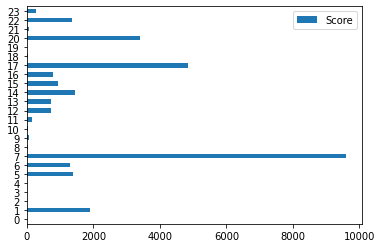

In [0]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [0]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 62.866915957004025
Test Prediction  62.940745096225626


In [0]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  69.89880301628682


In [0]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  67.6706570948766


In [0]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  66.9105443546407


In [0]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  68.83644293675793


In [0]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  67.58826532615953


In [0]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  67.71713839719612


In [0]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  33.797562795324545


In [0]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
15,packet_count_index,5.967164
11,enqueue_time,1.053099
10,hop_percentage,0.466132
21,cache_coherence_vnet_index,0.457683
2,cache_coherence_type,0.420824
17,port_index,0.319231
23,vnet_vc_cc_index,0.308046
3,flit_id,0.227684
4,flit_type,0.207453
8,hop_count,0.192196


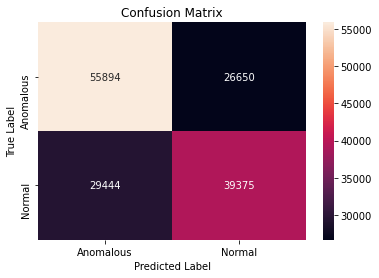

In [0]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.68      0.67     82544
           1       0.60      0.57      0.58     68819

    accuracy                           0.63    151363
   macro avg       0.63      0.62      0.62    151363
weighted avg       0.63      0.63      0.63    151363



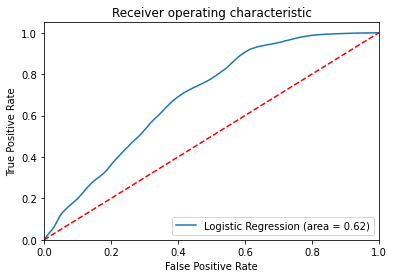

In [0]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

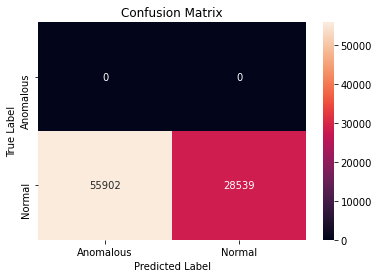

In [0]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.51     84441

    accuracy                           0.34     84441
   macro avg       0.50      0.17      0.25     84441
weighted avg       1.00      0.34      0.51     84441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [0]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [0]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 84.61215752859022
Test Prediction  76.94020335220628


In [0]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  79.2121025238509


In [0]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  76.43454093707956


In [0]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  78.21108350437507


In [0]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  76.39835231402957


In [0]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  76.00145308879551


In [0]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  75.86565742840592


In [0]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  23.64728034959321


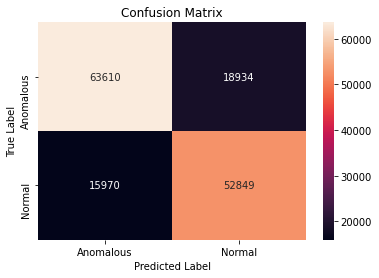

In [0]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78     82544
           1       0.74      0.77      0.75     68819

    accuracy                           0.77    151363
   macro avg       0.77      0.77      0.77    151363
weighted avg       0.77      0.77      0.77    151363



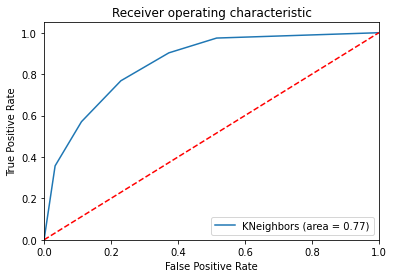

In [0]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

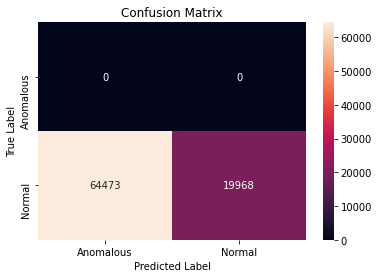

In [0]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.24      0.38     84441

    accuracy                           0.24     84441
   macro avg       0.50      0.12      0.19     84441
weighted avg       1.00      0.24      0.38     84441



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [0]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [0]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 62.03200253694761
Test Prediction Score 61.82422388562595


In [0]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 54.65851858081275


In [0]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  51.18779891384408


In [0]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  49.212880670156245


In [0]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  53.15338017930701


In [0]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  50.48207202607705


In [0]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  50.88308347814136


In [0]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  48.44447602467996


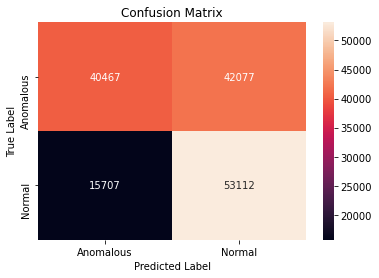

In [0]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.72      0.49      0.58     82544
           1       0.56      0.77      0.65     68819

    accuracy                           0.62    151363
   macro avg       0.64      0.63      0.62    151363
weighted avg       0.65      0.62      0.61    151363



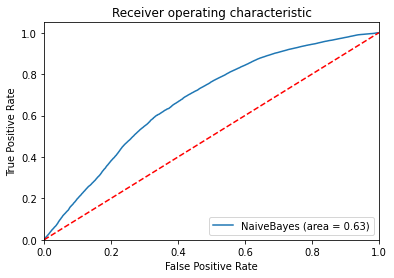

In [0]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [0]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

2-Layer Neural Network

In [0]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 484361 samples, validate on 121091 samples
Epoch 1/10
484361/484361 [==============================] - 16s 33us/step - loss: 0.2156 - accuracy: 0.6381 - val_loss: 0.2102 - val_accuracy: 0.6468
Epoch 2/10
484361/484361 [==============================] - 16s 33us/step - loss: 0.2091 - accuracy: 0.6547 - val_loss: 0.2038 - val_accuracy: 0.6612
Epoch 3/10
484361/484361 [==============================] - 16s 33us/step - loss: 0.2024 - accuracy: 0.6632 - val_loss: 0.2015 - val_accuracy: 0.6665
Epoch 4/10
484361/484361 [==============================] - 16s 33us/step - loss: 0.2011 - accuracy: 0.6612 - val_loss: 0.2005 - val_accuracy: 0.6611
Epoch 5/10
484361/484361 [==============================] - 16s 33us/step - loss: 0.2008 - accuracy: 0.6613 - val_loss: 0.2005 - val_accuracy: 0.6619
Epoch 6/10
484361/484361 [==============================] - 16s 33us/step - loss: 0.2006 - accuracy: 0.6618 - val_loss: 0.2002 - val_accuracy: 0.6664
Epoch 7/10
484361/484361 [======================

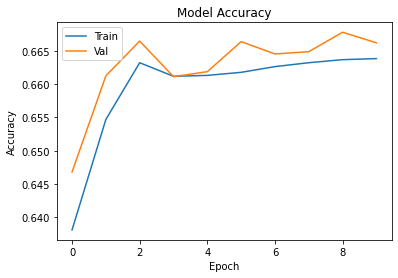

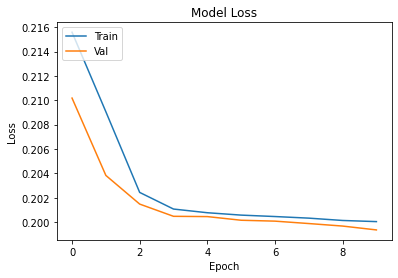

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 66.46%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 60.28%


In [0]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.66%


In [0]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.13%


In [0]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 58.18%


In [0]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.87%


In [0]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.21%


In [0]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 45.56%


3-Layer Neural Network

In [0]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 484361 samples, validate on 121091 samples
Epoch 1/30
484361/484361 [==============================] - 16s 33us/step - loss: 0.2353 - accuracy: 0.5839 - val_loss: 0.2184 - val_accuracy: 0.6321
Epoch 2/30
484361/484361 [==============================] - 16s 34us/step - loss: 0.2158 - accuracy: 0.6296 - val_loss: 0.2126 - val_accuracy: 0.6320
Epoch 3/30
484361/484361 [==============================] - 16s 33us/step - loss: 0.2101 - accuracy: 0.6372 - val_loss: 0.2082 - val_accuracy: 0.6414
Epoch 4/30
484361/484361 [==============================] - 16s 33us/step - loss: 0.2070 - accuracy: 0.6472 - val_loss: 0.2059 - val_accuracy: 0.6490
Epoch 5/30
484361/484361 [==============================] - 16s 33us/step - loss: 0.2054 - accuracy: 0.6526 - val_loss: 0.2055 - val_accuracy: 0.6540
Epoch 6/30
484361/484361 [==============================] - 19s 38us/step - loss: 0.2045 - accuracy: 0.6556 - val_loss: 0.2044 - val_accuracy: 0.6540
Epoch 7/30
484361/484361 [======================

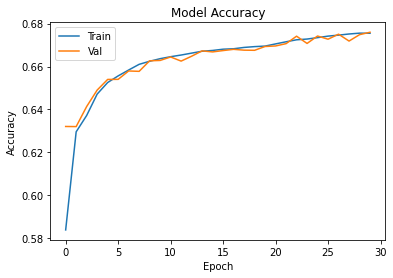

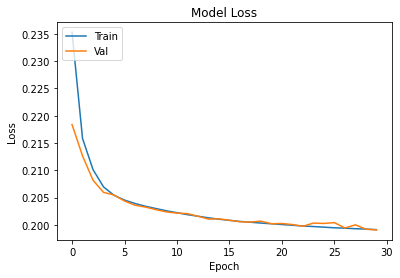

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.71%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 57.65%
accuracy: 55.51%
accuracy: 55.70%
accuracy: 55.43%
accuracy: 55.27%
accuracy: 55.36%
accuracy: 49.05%


4-Layer Neural Network



In [0]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 484361 samples, validate on 121091 samples
Epoch 1/30
484361/484361 [==============================] - 17s 35us/step - loss: 0.2372 - accuracy: 0.5925 - val_loss: 0.2262 - val_accuracy: 0.6296
Epoch 2/30
484361/484361 [==============================] - 17s 35us/step - loss: 0.2217 - accuracy: 0.6375 - val_loss: 0.2179 - val_accuracy: 0.6444
Epoch 3/30
484361/484361 [==============================] - 17s 35us/step - loss: 0.2157 - accuracy: 0.6440 - val_loss: 0.2136 - val_accuracy: 0.6453
Epoch 4/30
484361/484361 [==============================] - 17s 35us/step - loss: 0.2119 - accuracy: 0.6529 - val_loss: 0.2103 - val_accuracy: 0.6586
Epoch 5/30
484361/484361 [==============================] - 18s 37us/step - loss: 0.2094 - accuracy: 0.6616 - val_loss: 0.2090 - val_accuracy: 0.6629
Epoch 6/30
484361/484361 [==============================] - 17s 34us/step - loss: 0.2074 - accuracy: 0.6644 - val_loss: 0.2057 - val_accuracy: 0.6655
Epoch 7/30
484361/484361 [======================

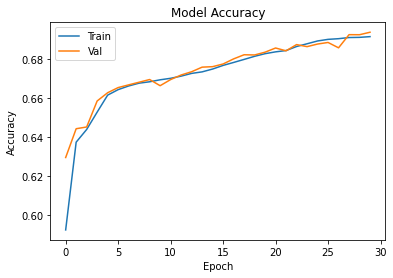

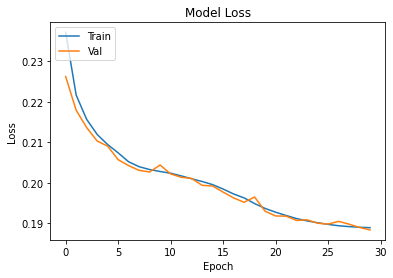

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.27%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 65.03%
accuracy: 62.12%
accuracy: 60.88%
accuracy: 63.23%
accuracy: 61.02%
accuracy: 61.80%
accuracy: 37.97%


5-Layer Neural Network Optimized

In [0]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 484361 samples, validate on 121091 samples
Epoch 1/100
484361/484361 [==============================] - 29s 61us/step - loss: 0.2038 - accuracy: 0.6599 - val_loss: 0.1940 - val_accuracy: 0.6839
Epoch 2/100
484361/484361 [==============================] - 29s 60us/step - loss: 0.1950 - accuracy: 0.6800 - val_loss: 0.1838 - val_accuracy: 0.7091
Epoch 3/100
484361/484361 [==============================] - 29s 60us/step - loss: 0.1889 - accuracy: 0.6921 - val_loss: 0.1808 - val_accuracy: 0.7089
Epoch 4/100
484361/484361 [==============================] - 30s 61us/step - loss: 0.1855 - accuracy: 0.7001 - val_loss: 0.1767 - val_accuracy: 0.7157
Epoch 5/100
484361/484361 [==============================] - 30s 62us/step - loss: 0.1830 - accuracy: 0.7055 - val_loss: 0.1716 - val_accuracy: 0.7349
Epoch 6/100
484361/484361 [==============================] - 30s 63us/step - loss: 0.1809 - accuracy: 0.7101 - val_loss: 0.1698 - val_accuracy: 0.7358
Epoch 7/100
484361/484361 [===============

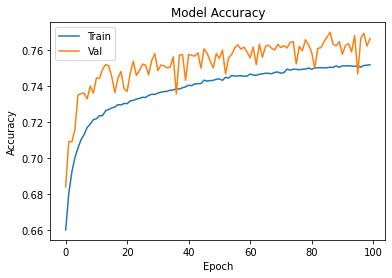

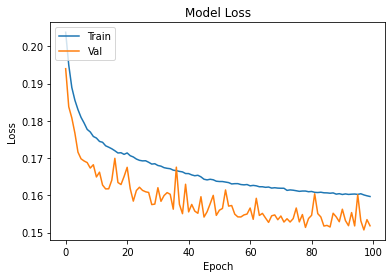

In [0]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 76.48%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 74.58%
accuracy: 72.73%
accuracy: 72.73%
accuracy: 72.63%
accuracy: 71.95%
accuracy: 71.10%
accuracy: 26.16%


In [0]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 484361 samples, validate on 121091 samples
Epoch 1/50
484361/484361 [==============================] - 30s 62us/step - loss: 0.2038 - accuracy: 0.6619 - val_loss: 0.2019 - val_accuracy: 0.6577
Epoch 2/50
484361/484361 [==============================] - 30s 62us/step - loss: 0.1943 - accuracy: 0.6828 - val_loss: 0.1867 - val_accuracy: 0.6932
Epoch 3/50
484361/484361 [==============================] - 29s 61us/step - loss: 0.1864 - accuracy: 0.6984 - val_loss: 0.1736 - val_accuracy: 0.7301
Epoch 4/50
484361/484361 [==============================] - 30s 61us/step - loss: 0.1814 - accuracy: 0.7095 - val_loss: 0.1703 - val_accuracy: 0.7327
Epoch 5/50
484361/484361 [==============================] - 29s 60us/step - loss: 0.1782 - accuracy: 0.7163 - val_loss: 0.1706 - val_accuracy: 0.7298
Epoch 6/50
484361/484361 [==============================] - 29s 61us/step - loss: 0.1766 - accuracy: 0.7191 - val_loss: 0.1659 - val_accuracy: 0.7409
Epoch 7/50
484361/484361 [======================

In [0]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.53%


In [0]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.82%
accuracy: 70.65%
accuracy: 70.07%
accuracy: 70.73%
accuracy: 70.20%
accuracy: 70.05%
accuracy: 28.62%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [0]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [0]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 94.21969041311284
Test Prediction Score 89.67250913367202


In [0]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 83.03852586923817
Test Prediction Score 79.74211162069
Test Prediction Score 80.93629391025956
Test Prediction Score 80.04458444390599
Test Prediction Score 80.92624592546048
Test Prediction Score 80.44159082653472
Test Prediction Score 21.30363212183655


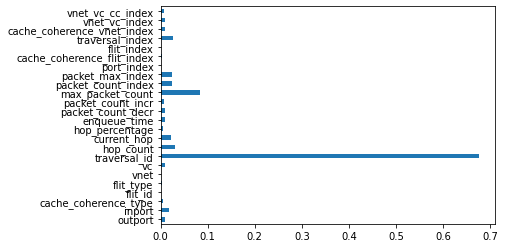

In [0]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

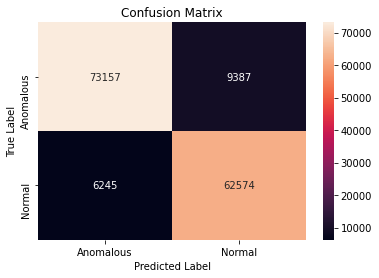

In [0]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.92      0.89      0.90     82544
           1       0.87      0.91      0.89     68819

    accuracy                           0.90    151363
   macro avg       0.90      0.90      0.90    151363
weighted avg       0.90      0.90      0.90    151363



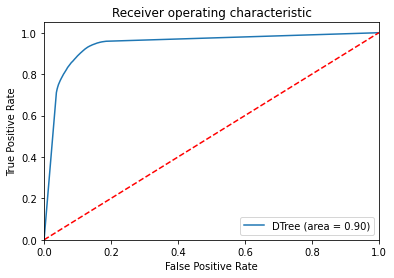

In [0]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [0]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [0]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 97.56248224467011
Test Prediction Score 91.85401980668988


In [0]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 85.18861136807483
Test Prediction Score 80.7497029275143
Test Prediction Score 82.4329500034372
Test Prediction Score 81.00896535013327
Test Prediction Score 82.21438950634253
Test Prediction Score 81.3506906606191
Test Prediction Score 20.65110550561931


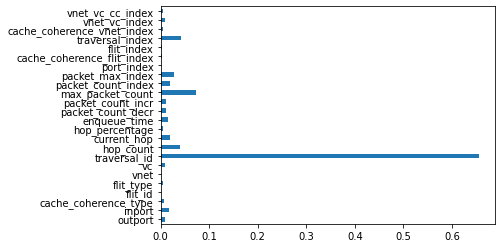

In [0]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

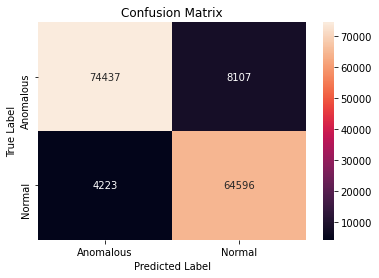

In [0]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92     82544
           1       0.89      0.94      0.91     68819

    accuracy                           0.92    151363
   macro avg       0.92      0.92      0.92    151363
weighted avg       0.92      0.92      0.92    151363



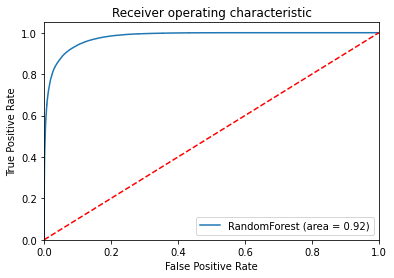

In [0]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [0]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [0]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 99.60773108355411
Test Prediction Score 94.90430290097316


In [0]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 87.52744839701361
Test Prediction Score 82.26992840798609
Test Prediction Score 84.8114940045371
Test Prediction Score 83.03368063968985
Test Prediction Score 84.67874955818246
Test Prediction Score 82.93032525353675
Test Prediction Score 18.479174808446132


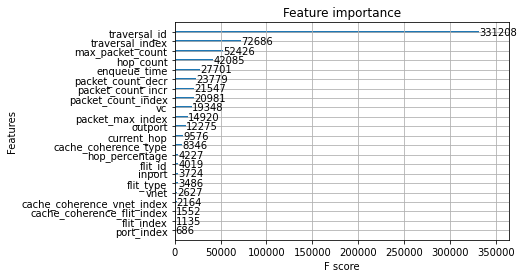

In [0]:
plot_importance(xgbc)
plt.show()

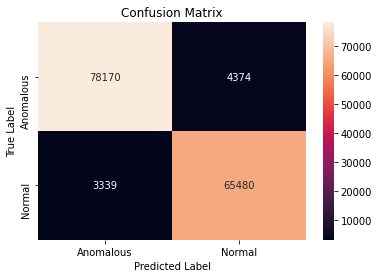

In [0]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     82544
           1       0.94      0.95      0.94     68819

    accuracy                           0.95    151363
   macro avg       0.95      0.95      0.95    151363
weighted avg       0.95      0.95      0.95    151363



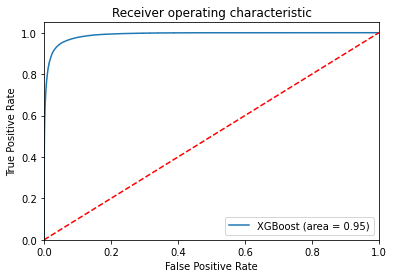

In [0]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [0]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [0]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 83.19107047296896
Test Prediction Score 82.42040657227989


In [0]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 78.93177846924377
Test Prediction Score 77.44900664853134
Test Prediction Score 77.76522926139432
Test Prediction Score 76.56312091107343
Test Prediction Score 76.8909790676668
Test Prediction Score 75.95696011152671
Test Prediction Score 21.594959794412667


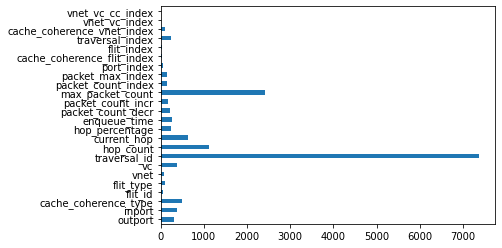

In [0]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

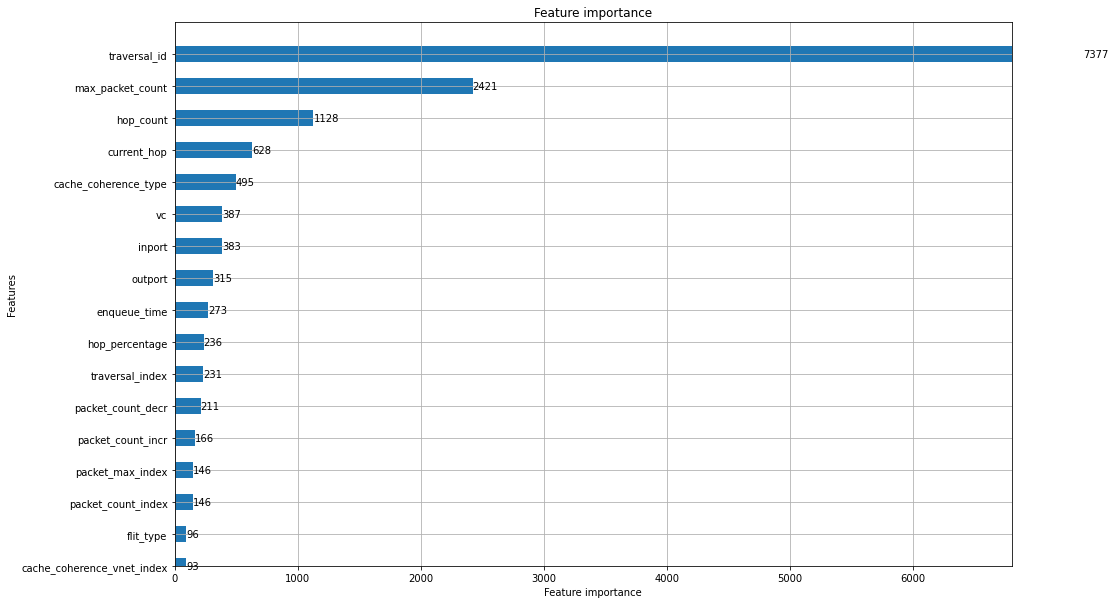

In [0]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [0]:
sorted(gbm.feature_importances_,reverse=True)

[7377,
 2421,
 1128,
 628,
 495,
 387,
 383,
 315,
 273,
 236,
 231,
 211,
 166,
 146,
 146,
 96,
 93,
 70,
 66,
 58,
 44,
 30,
 0,
 0]

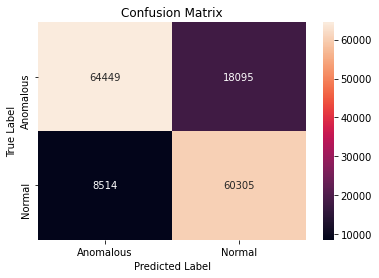

In [0]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [0]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.88      0.78      0.83     82544
           1       0.77      0.88      0.82     68819

    accuracy                           0.82    151363
   macro avg       0.83      0.83      0.82    151363
weighted avg       0.83      0.82      0.82    151363



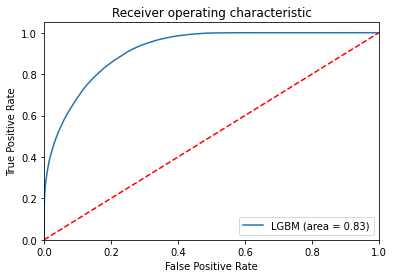

In [0]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()